#Работа с Biopython. Карта Рамачандрана

##Biopython


> В данном разделе использованы основные функции Biopython'а для решения поставленной задачи.



Стандартная установка и подключение библиотеки.

In [ ]:
!pip install biopython
from Bio.PDB import *
import math
import matplotlib.pyplot as plt
import numpy as np
from math import pi

Загрузка белковых структур производится с помощью объекта PDBList, используя метод "retrieve_pdb_file". Аргументом этого метода является идентификатор структуры PDB. В рассматриваемом случае идентефикатором структуры выступает FULL SEQUENCE DESIGN-1.

Это загрузит указанный файл (pdb1fsd.ent) с сервера и сохранит его в текущем рабочем каталоге.

In [ ]:
pdbl = PDBList() 
pdbl.retrieve_pdb_file('1FSD', pdir = '.', file_format = 'pdb')

Structure exists: './pdb1fsd.ent' 


'./pdb1fsd.ent'

Чтобы загрузить файл pdb, используйте Bio.PDB.PDBParser, как указано ниже —

In [ ]:
parser = PDBParser(PERMISSIVE = True, QUIET = True) 
data = parser.get_structure("1FSD","pdb1fsd.ent")

После того, как мы загрузили структуру, можно проверить её с помощью кода представленного ниже.

А также что содержится внутри самих данных.

In [ ]:
print(data)
print(data.header.keys())

<Structure id=1FSD>
dict_keys(['name', 'head', 'idcode', 'deposition_date', 'release_date', 'structure_method', 'resolution', 'structure_reference', 'journal_reference', 'author', 'compound', 'source', 'has_missing_residues', 'missing_residues', 'keywords', 'journal'])


Например, посмотрим что содержится в "name".

In [ ]:
print(data.header["name"]) 

full sequence design 1 (fsd-1) of beta beta alpha motif, nmr, 41 structures


Метод get_models возвращает итератор для моделей.

In [ ]:
model = data.get_models() 
model 

<generator object Structure.get_models at 0x7f6d64bc6db0>

Метод get_chain возвращает итератор по цепочкам. 

Из результата видно, что в нашей структуре состоит одна цепочка.

In [ ]:
models = list(model) 
chains = list(models[0].get_chains()) 
chains

[<Chain id=A>]

Воспользовавшись методом get_residues к полученной цепочке, можно посмотреть из остатков каких аминокислот состоит она.

In [ ]:
residue = list(chains[0].get_residues())
residue

[<Residue GLN het=  resseq=1 icode= >,
 <Residue GLN het=  resseq=2 icode= >,
 <Residue TYR het=  resseq=3 icode= >,
 <Residue THR het=  resseq=4 icode= >,
 <Residue ALA het=  resseq=5 icode= >,
 <Residue LYS het=  resseq=6 icode= >,
 <Residue ILE het=  resseq=7 icode= >,
 <Residue LYS het=  resseq=8 icode= >,
 <Residue GLY het=  resseq=9 icode= >,
 <Residue ARG het=  resseq=10 icode= >,
 <Residue THR het=  resseq=11 icode= >,
 <Residue PHE het=  resseq=12 icode= >,
 <Residue ARG het=  resseq=13 icode= >,
 <Residue ASN het=  resseq=14 icode= >,
 <Residue GLU het=  resseq=15 icode= >,
 <Residue LYS het=  resseq=16 icode= >,
 <Residue GLU het=  resseq=17 icode= >,
 <Residue LEU het=  resseq=18 icode= >,
 <Residue ARG het=  resseq=19 icode= >,
 <Residue ASP het=  resseq=20 icode= >,
 <Residue PHE het=  resseq=21 icode= >,
 <Residue ILE het=  resseq=22 icode= >,
 <Residue GLU het=  resseq=23 icode= >,
 <Residue LYS het=  resseq=24 icode= >,
 <Residue PHE het=  resseq=25 icode= >,
 <Residue

Можно пойти на следующий уровень и посмотреть из каких атомов состоит остаток той или иной аминокислоты. Например, из чего состоит остаток глутамина.

In [ ]:
atoms = list(residue[0].get_atoms()) 
atoms 

[<Atom N>,
 <Atom CA>,
 <Atom C>,
 <Atom O>,
 <Atom CB>,
 <Atom CG>,
 <Atom CD>,
 <Atom OE1>,
 <Atom NE2>,
 <Atom H1>,
 <Atom H2>,
 <Atom H3>,
 <Atom HA>,
 <Atom HB2>,
 <Atom HB3>,
 <Atom HG2>,
 <Atom HG3>,
 <Atom HE21>,
 <Atom HE22>]

##Карта Рамачандра и продолжение использования возможностей Biopython.

Прежде чем строить что-то, дадим объяснение что это за карта, как она строится и зачем вообще нужна.


> Что это?

Это построенное из расположения торсионных$^1$ углов изображение, анализирую которое, позволяет наблюдающему с высокой степенью точности определить вторичную структуру белка.

> Зачем?

Она лишь позволяет увидеть преобладающую конформацию аминокислот в белке.

> Как понимаем структуру белка?

С помощью карты можно установить, какие торсионные$^1$ углы характерны для α-спиралей и для β-листов, для различных аминокислотных остатков





---
1. Торсионный угол (вокруг какой-либо связи) — это двугранный угол, определяющий взаимный поворот частей молекулы, находящихся по разные стороны от этой связи. добной моделью для демонстрации торсионных углов является условная система из четырех атомов (А–В–С–D), как на рисунке ниже.

  Торсионный угол вокруг связи B–C — это двугранный угол между плоскостями, в которых лежат атомы A,B,C и B,C,D.

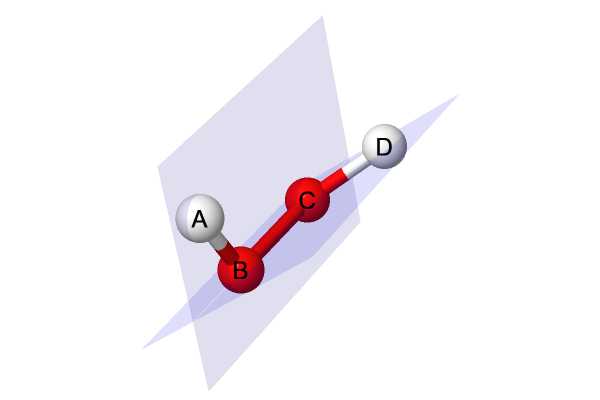

Source: https://xn--n1afeh.xn--80abvyzg.xn--p1ai/%D0%BC%D0%BE%D0%BB%D0%B5%D0%BA%D1%83%D0%BB%D1%8B/%D0%A0%D0%B0%D0%BC%D0%B0%D1%87%D0%B0%D0%BD%D0%B4%D1%80%D0%B0%D0%BD.html




Получаем углы $\phi$ и $\psi$ путем полезного метода get_phi_psi_list с аргументом, который содержит в себе информацию про остатки аминокислоты.

In [ ]:
ang = Polypeptide.Polypeptide.get_phi_psi_list(residue)

Построим карту Рамачандра на основе полученных выше торсионных углов.

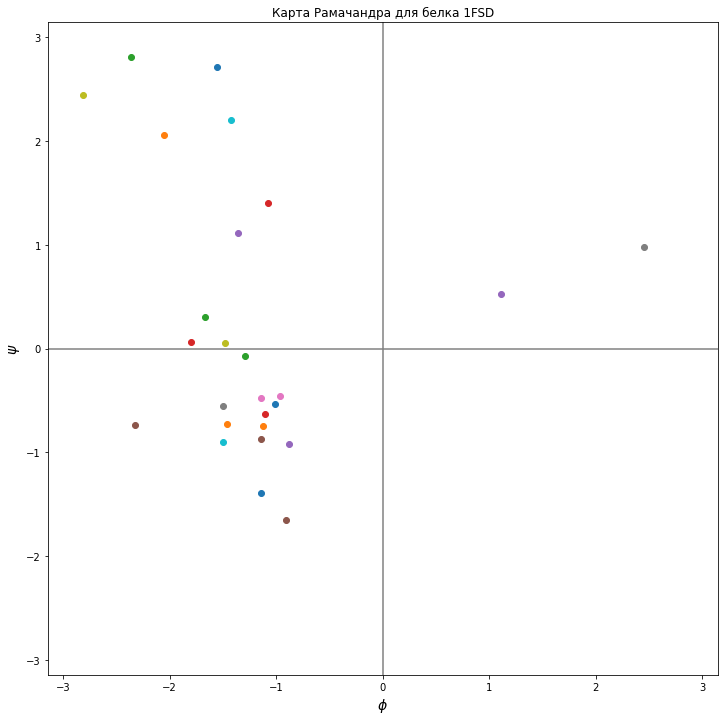

In [ ]:
plt.figure(figsize = (12,12))
plt.axis([-pi, pi, -pi, pi])
plt.plot([0,0],[-pi,pi],'gray')
plt.plot([-pi,pi],[0,0],'gray')
plt.xlabel('$\phi$', size=14)
plt.ylabel('$\psi$', size=14)
plt.title(u'Карта Рамачандра для белка 1FSD')
#plt.grid()
for i in range(len(ang)-2):
  plt.scatter(((ang[i+1])[0]) ,((ang[i+1])[1]))

Для проверки можно сравнить с: http://eds.bmc.uu.se/cgi-bin/eds/rama?pdbCode=1FSB&ramaServer=YES


Большинство значений торсионных углов в α-спиралях почти одинаковы и приблизительно равны (большинство по φ от -150 до -50, по ψ от -60 до 20 и от 110 до 170 (концы спирали); по φ от 60 до 80, по ψ от 0 до 30 (концы спирали)) . Это обусловленно тем, что остов белка в данных участках имеет укладку α-спирали.


В β-листах значения торсионных углов также принадлежат ограниченному дапазону (большинство по φ от -160 до -70, по ψ от 110 до 170)

Source: https://kodomo.fbb.msu.ru/~megabotan/term1/text/ramachandran.html


ИЛИ

Стандартные значения углов для вторичных структур в белках:

Правозакрученная α-спираль — ϕ = –57°, ψ = –47°

Параллельный β-лист — ϕ = –119°, ψ = +113°

Антипараллельный β-лист — ϕ = –139°, ψ = +136°

Левозакрученная α-спираль — ϕ = +57°, ψ = +47°

Спираль $3_{10}$ — ϕ = –49°, ψ = –26°

π-спираль — ϕ = –57°, ψ = –80°

Полипролиновая спираль — ϕ = –79°, ψ = +150°

Спираль коллагена — ϕ = –51°, ψ = +153°

Source: https://xn--n1afeh.xn--80abvyzg.xn--p1ai/%D0%BC%D0%BE%D0%BB%D0%B5%D0%BA%D1%83%D0%BB%D1%8B/%D0%A0%D0%B0%D0%BC%D0%B0%D1%87%D0%B0%D0%BD%D0%B4%D1%80%D0%B0%D0%BD.html

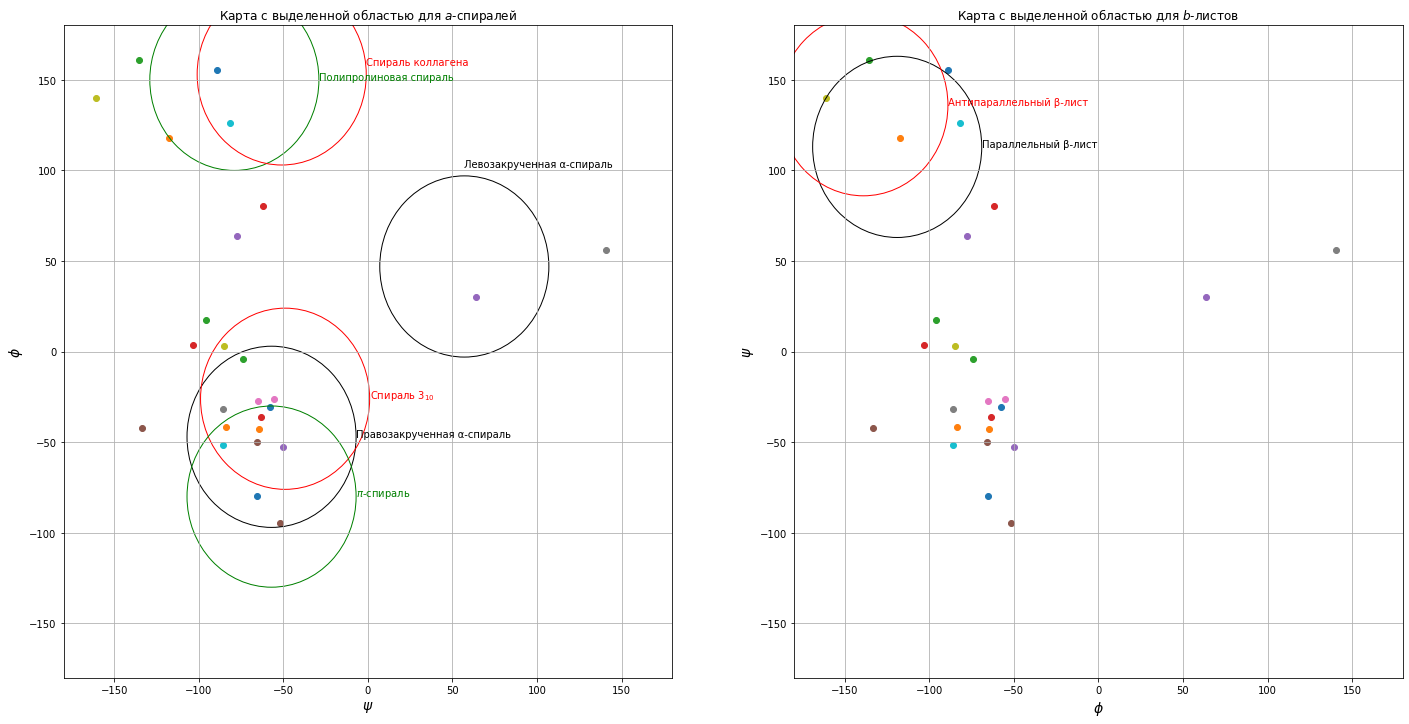

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (24,12))
fig.subplots_adjust(hspace=0.5)
grad = 180/pi
ax1.axis([-180, 180, -180, 180])
ax2.axis([-180, 180, -180, 180])
ax1.grid()
ax2.grid()

#Правозакрученная α-спираль
circle = plt.Circle((-57,-47),50,fill = False)
ax1.add_patch(circle)
ax1.text(-57+50,-47,u"Правозакрученная α-спираль")

#Параллельный β-лист
circle = plt.Circle((-119,113),50,fill = False)
ax2.add_patch(circle)
ax2.text(-119+50,113,u"Параллельный β-лист")

#Антипараллельный β-лист
circle = plt.Circle((-139,136),50,fill = False,color = 'r')
ax2.add_patch(circle)
ax2.text(-139+50,136,u"Антипараллельный β-лист",color = 'r')

#Левозакрученная α-спираль
circle = plt.Circle((57,47),50,fill = False)
ax1.add_patch(circle)
ax1.text(57,47+55,u"Левозакрученная α-спираль")

#Спираль $3_{10}$
circle = plt.Circle((-49,-26),50,fill = False,color = 'r')
ax1.add_patch(circle)
ax1.text(-49+50,-26,u"Спираль $3_{10}$",color = 'r')

#π-спираль
circle = plt.Circle((-57,-80),50,fill = False,color = 'g')
ax1.add_patch(circle)
ax1.text(-57+50,-80,u"$\pi$-спираль",color = 'g')

#Полипролиновая спираль — ϕ = –79°, ψ = +150°
circle = plt.Circle((-79,150),50,fill = False,color = 'g')
ax1.add_patch(circle)
ax1.text(-79 + 50,150,u"Полипролиновая спираль",color = 'g')
#Спираль коллагена — ϕ = –51°, ψ = +153°
circle = plt.Circle((-51,153),50,fill = False,color = 'r')
ax1.add_patch(circle)
ax1.text(-51+50,153+5,u"Спираль коллагена",color = 'r')


for i in range(len(ang)-2):
  ax1.scatter(((ang[i+1])[0])*grad ,((ang[i+1])[1])*grad)
  ax2.scatter(((ang[i+1])[0])*grad ,((ang[i+1])[1])*grad)
# ax1.plot([-150,-150,-50,-50,-150],[-60,20,20,-60,-60],'darkblue')
# ax1.plot([-150,-150,-50,-50,-150],[110,170,170,110,110],'darkblue')
# ax2.plot([-160,-160,-70,-70,-160],[110,170,170,110,110],'darkblue')
ax1.set_title(u'Карта с выделенной областью для $a$-спиралей')
ax2.set_title(u'Карта с выделенной областью для $b$-листов')
ax1.set_ylabel('$\phi$',size = 14)
ax1.set_xlabel('$\psi$',size = 14)
ax2.set_xlabel('$\phi$',size = 14)
ax2.set_ylabel('$\psi$',size = 14)
plt.show()

Посмотрим на выделенные области. 

Из рисунков очевидно, что у нас присутствует $a$-спираль, т.к. там большая концентрация углов по сравнению с остальными областями, где не более 4х углов. Правозакрученная $a$-спираль преобладает по количеству углов в ней => во вторичной структуре рассматриваемого белка присутствует $a$-спираль. 

Произвести проверку результатов достаточно просто - можно посмотреть изображение белка в PDB.

Рассматриваемый нами белок 1FSD выглядит так:

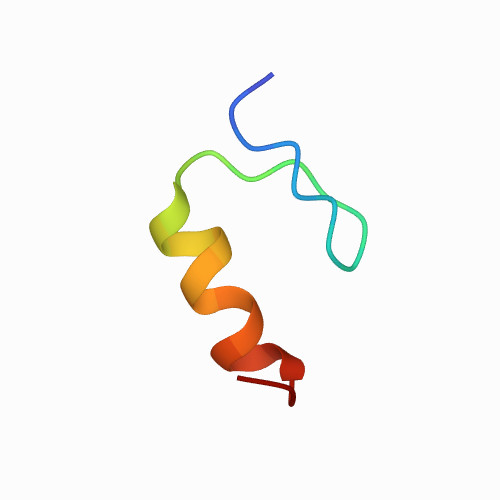

На изображении отчетливо наблюдается правозакрученная $a$-спираль, что подтверждает наше предсказание по карте Рамачандра.

$\blacktriangle$

Использованные источники:
1. https://coderlessons.com/tutorials/python-technologies/izuchite-biopython/biopaiton-kratkoe-rukovodstvo

2. https://xn--n1afeh.xn--80abvyzg.xn--p1ai/%D0%BC%D0%BE%D0%BB%D0%B5%D0%BA%D1%83%D0%BB%D1%8B/%D0%A0%D0%B0%D0%BC%D0%B0%D1%87%D0%B0%D0%BD%D0%B4%D1%80%D0%B0%D0%BD.html

3. https://biopython.org/wiki/The_Biopython_Structural_Bioinformatics_FAQ

4. https://www.rcsb.org/structure/1fsd

5. http://eds.bmc.uu.se/ramachan.html

6. https://kodomo.fbb.msu.ru/~megabotan/term1/text/ramachandran.html

#Использование карты Рамачандрана для множества белковых структур

Подключить все необходимые библиотеки

In [ ]:
!pip install biopython
from Bio.PDB import *
import math
import matplotlib.pyplot as plt
import numpy as np
from math import pi

     |████████████████████████████████| 2.3MB 4.7MB/s 


Связываем коллаб и драйв

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Следующий блок основан на предыдущем разделе.

Имеется некий файл на драйве, на четных строках которого содержится название белковой структуры, а на нечетных - полипептидная цепочка.

Каждый четный шаг программа рассчитывает торсионные углы для полученной из файла белковой структуры. На нечетном шаге в список помещается цепочка. На этом же шаге рисуются углы $\phi$ и $\psi$, а их цвет определяется из полипептидной цепочки следующим образом: если в цепочке стоит "H", то окрашиваем этот угол в красный, если стоит "C", то синий цвет, а если ни то ни другое, то зеленый цвет.

Structure exists: './pdb132l.ent' 
Structure exists: './pdb133l.ent' 
Structure exists: './pdb134l.ent' 
Structure exists: './pdb135l.ent' 
Structure exists: './pdb149l.ent' 
Structure exists: './pdb153l.ent' 
Structure exists: './pdb177l.ent' 
Structure exists: './pdb189l.ent' 
Structure exists: './pdb1a0k.ent' 
Structure exists: './pdb1a11.ent' 
Structure exists: './pdb1a18.ent' 
Structure exists: './pdb1a1d.ent' 
Structure exists: './pdb1a1s.ent' 
Structure exists: './pdb1a1w.ent' 
Structure exists: './pdb1a1x.ent' 
Structure exists: './pdb1a1z.ent' 
Structure exists: './pdb1a23.ent' 
Structure exists: './pdb1a24.ent' 
Structure exists: './pdb1a2j.ent' 
Structure exists: './pdb1a32.ent' 
Structure exists: './pdb1a33.ent' 
Structure exists: './pdb1a3h.ent' 
Structure exists: './pdb1a3p.ent' 
Structure exists: './pdb1a3s.ent' 
Structure exists: './pdb1a43.ent' 
Structure exists: './pdb1a45.ent' 
Structure exists: './pdb1a57.ent' 
Structure exists: './pdb1a58.ent' 
Structure exists: '.

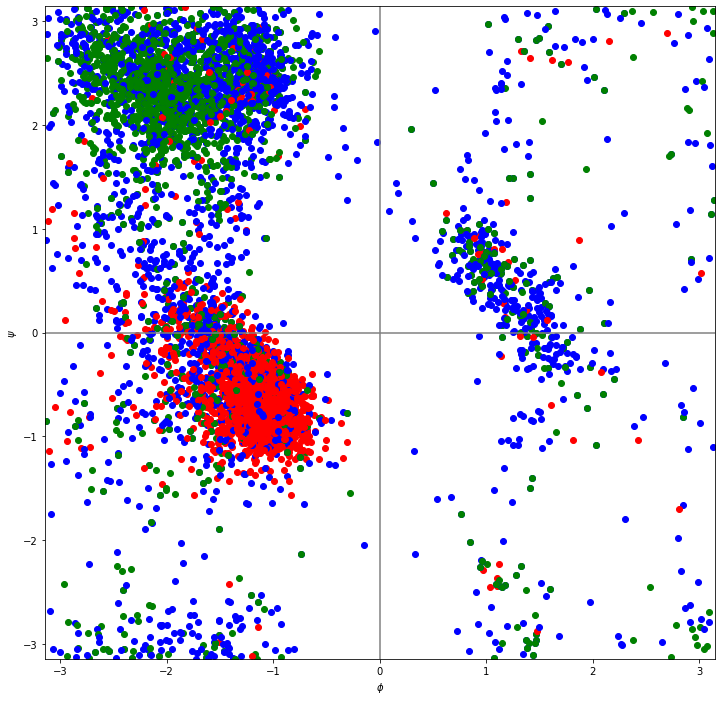

In [ ]:
file = open("/content/drive/MyDrive/train.ss")
prot = []
redcount = 0;
bluecount = 0;
greencount = 0;
redhistfi = [];
redhistksi = [];
bluehistfi = [];
bluehistksi = [];
greenhistfi = []
greenhistksi = [];
tcp = []

plt.figure(figsize = (12,12))
plt.xlabel("$\phi$")
plt.ylabel("$\psi$")
plt.axis([-pi, pi, -pi, pi])
plt.plot([0,0],[-pi,pi],'gray')
plt.plot([-pi,pi],[0,0],'gray')

for i in range(100):
  train = file.readline()

  if (i % 2 == 0):
    prot.append(train[1:5])
    pdbl = PDBList() 
    pdbl.retrieve_pdb_file(train[1:5], pdir = '.', file_format = 'pdb')
    stor = 'pdb'+train[1:5] +'.ent'
    parser = PDBParser(PERMISSIVE = True, QUIET = True) 
    data = parser.get_structure(train[1:5],stor.lower())
    model = data.get_models() 
    models = list(model) 
    chains = list(models[0].get_chains()) 

    residue = []
    for z in range(len(chains)):
      residue += list(chains[z].get_residues())

    ang = Polypeptide.Polypeptide.get_phi_psi_list(residue)

    fi = []
    ksi = []
    for i in range(len(ang)-2):
      fi.append((ang[i+1])[0])
      ksi.append((ang[i+1])[1])
    # if (fi.count(None)!=0) and (ksi.count(None)!=0):
    #   if (ksi.index(None)>=fi.index(None)):
    #     for i in range((fi.index(None))):
    #       plt.scatter(fi[i],ksi[i])
    #   if (ksi.index(None)<fi.index(None)):
    #     for i in range((ksi.index(None))):
    #       plt.scatter(fi[i],ksi[i])
    # if (ksi.count(None)==0) and (fi.count(None)==0) :
    #   for i in range(len(ksi)):
    #      plt.scatter(fi[i],ksi[i])

  if (train[0]!='>'):
    tcp.append(train)
    Flag = True
    max = 0

    if (fi.count(None)!=0) and (ksi.count(None)!=0):
        if (ksi.index(None)>=fi.index(None)) and (len(tcp[-1]) > fi.index(None)):
          max = fi.index(None)
        if (ksi.index(None)<fi.index(None)) and (len(tcp[-1]) > ksi.index(None)):
          max = ksi.index(None)
        if (len(tcp[-1])<fi.index(None)) and (len(tcp[-1]) < ksi.index(None)):
          max = len(tcp[-1])
    if (ksi.count(None)==0) and (fi.count(None)==0) :
        if (ksi.count(None)>=fi.count(None)) and (len(tcp[-1]) > fi.count(None)):
          max = len(fi)
        if (ksi.count(None)<fi.count(None)) and (len(tcp[-1]) > ksi.count(None)):
          max = len(ksi)
        if (len(tcp[-1]) < fi.count(None)) and (len(tcp[-1]) < ksi.count(None)):
          max = len(tcp[-1])

    for i in range(max-1):
      if (tcp[-1][i+1] == "H"):
        plt.scatter(fi[i],ksi[i],color = 'red')
        redcount +=1
        redhistfi.append(fi[i])
        redhistksi.append(ksi[i])

      if (tcp[-1][i+1] == "C"):
        plt.scatter(fi[i],ksi[i],color = 'blue')
        bluecount +=1
        bluehistfi.append(fi[i])
        bluehistksi.append(ksi[i])
        
      if (tcp[-1][i+1] != "H") and (tcp[-1][i] != "C") :
        plt.scatter(fi[i],ksi[i],color = 'green')
        greencount +=1
        greenhistfi.append(fi[i])
        greenhistksi.append(ksi[i])

file.close()

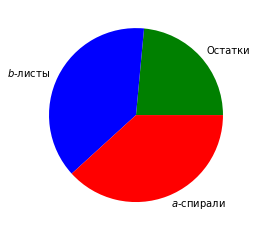

In [ ]:
vals = [greencount,redcount,bluecount]
labels = {"$a$-спирали","$b$-листы","Остатки"}
fig, ax = plt.subplots()
ax.pie(vals,labels = labels,colors = ('g','b','r'))
fig.savefig('pie.png')

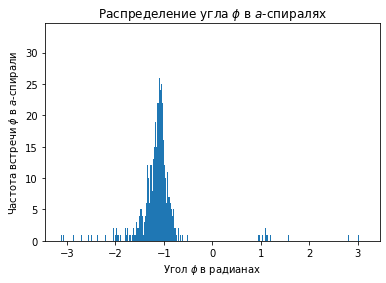

In [ ]:
plt.hist(redhistfi,bins=2000,range = (-pi,pi))
plt.title(u'Распределение угла $\phi$ в $a$-спиралях')
plt.xlabel(u'Угол $\phi$ в радианах')
plt.ylabel(u'Частота встречи $\phi$ в $a$-спирали')
plt.savefig("redhistfi.png")

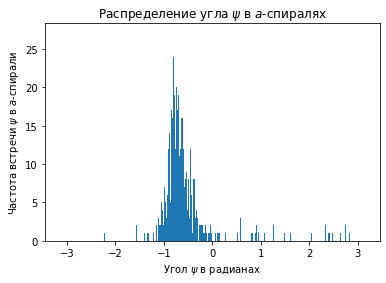

In [ ]:
plt.hist(redhistksi,bins=2000,range = (-pi,pi))
plt.title(u'Распределение угла $\psi$ в $a$-спиралях')
plt.xlabel(u'Угол $\psi$ в радианах')
plt.ylabel(u'Частота встречи $\psi$ в $a$-спирали')
plt.savefig("redhistksi.png")

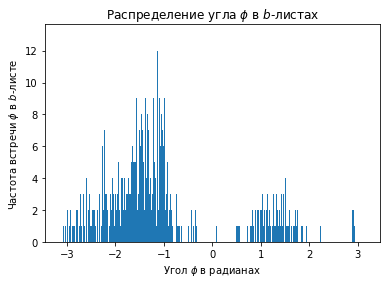

In [ ]:
plt.hist(bluehistfi,bins=2000,range = (-pi,pi))
plt.title(u'Распределение угла $\phi$ в $b$-листах')
plt.xlabel(u'Угол $\phi$ в радианах')
plt.ylabel(u'Частота встречи $\phi$ в $b$-листе')
plt.savefig("bluehistfi.png")

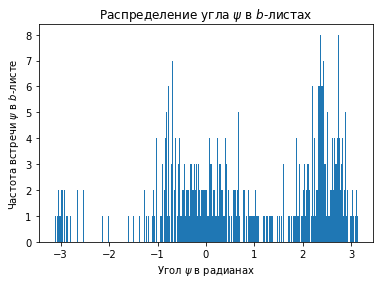

In [ ]:
plt.hist(bluehistksi,bins=2000,range = (-pi,pi))
plt.title(u'Распределение угла $\psi$ в $b$-листах')
plt.xlabel(u'Угол $\psi$ в радианах')
plt.ylabel(u'Частота встречи $\psi$ в $b$-листе')
plt.savefig("bluehistksi.png")

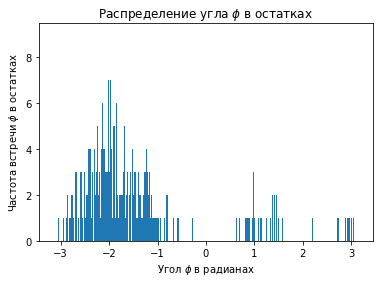

In [ ]:
plt.hist(greenhistfi,bins=2000,range = (-pi,pi))
plt.title(u'Распределение угла $\phi$ в остатках')
plt.xlabel(u'Угол $\phi$ в радианах')
plt.ylabel(u'Частота встречи $\phi$ в остатках')
plt.savefig("greenhistfi.png")

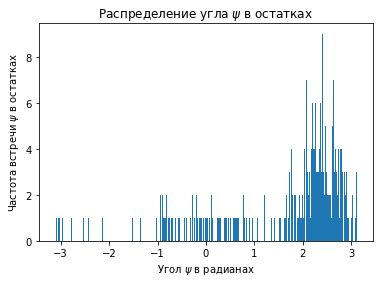

In [ ]:
plt.hist(greenhistksi,bins=2000,range = (-pi,pi))
plt.title(u'Распределение угла $\psi$ в остатках')
plt.xlabel(u'Угол $\psi$ в радианах')
plt.ylabel(u'Частота встречи $\psi$ в остатках')
plt.savefig("greenhistksi.png")

Анализируя полученные данные можно сказать:



> Пики углов для $a$-спиралей выделены достаточно четко, что дает возможность довольно точно определять этот элемент вторичной структуры на картах Рамачандран, на которых они преимущественно в 3-ей четверти.


> Для $b$-листов нет таких выраженных пиков, как для $a$-спиралей, однако можно сказать, что они преобладают в 1-й и 2-й четвертях



> Хоть остатков не так много, как предыдущих структур, но основываясь на гистограммах можно сказать, что на картах Рамачандрана они премущественно находятся во 2-й четверти


> Полученная в результате карта совпадает с теорией, которая была приведена в предыдущем разделе о местонахождениях элементов вторичных структур.









